In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import plotly.express as px


#Uso el archivo del anterior Challenges TelecomX1

In [ ]:
TelecomX2 = pd.read_json('/content/datos_TelecomX_Fla.json')

In [ ]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   int64  
 2   gender                    7267 non-null   object 
 3   SeniorCitizen             7267 non-null   int64  
 4   Partner                   7267 non-null   int64  
 5   Dependents                7267 non-null   int64  
 6   tenure                    7267 non-null   int64  
 7   PhoneService              7267 non-null   int64  
 8   MultipleLines             7267 non-null   int64  
 9   InternetService           7267 non-null   object 
 10  OnlineSecurity            7267 non-null   int64  
 11  OnlineBackup              7267 non-null   int64  
 12  DeviceProtection          7267 non-null   int64  
 13  TechSupport               7267 non-null   int64  
 14  StreamingTV  

In [ ]:
TelecomX2.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
import pandas as pd

def verificar_espacios_blancos(df):
    # Convertimos a str y usamos map (mejor alternativa a applymap)
    blancos = df.astype(str).map(lambda x: x.strip() == '')

    total_blancos = blancos.sum().sum()

    if total_blancos == 0:
        print("No se encontraron espacios en blanco en el DataFrame.")
        return

    print(f"Se encontraron {total_blancos} celdas con espacios en blanco.\n")

    # Cantidad por columna
    print("Celdas con espacios en blanco por columna:")
    print(blancos.sum()[blancos.sum() > 0])

    # Posiciones exactas
    print("\nPosiciones de las celdas con espacios en blanco:")
    posiciones = [(i, j) for i, row in blancos.iterrows() for j in row.index if row[j]]
    for fila, col in posiciones:
        print(f"  - Fila: {fila}, Columna: '{col}'")

    return blancos


In [ ]:
verificar_espacios_blancos(TelecomX2)

No se encontraron espacios en blanco en el DataFrame.


In [ ]:
# Verificar valores únicos en Churn (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CHURN:")
print("=" * 50)
churn_counts = TelecomX2['Churn'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CHURN:
Churn
0    5398
1    1869
Name: count, dtype: int64


In [ ]:
# Verificar si hay cadenas vacías en Churn
empty_churn = (TelecomX2['Churn'] == '').sum()
print(f"\nCadenas vacías en Churn: {empty_churn}")



Cadenas vacías en Churn: 0


In [ ]:
TelecomX2 = TelecomX2.drop(['customerID','Facturacion_Total_Diaria','Cuentas_Diarias'], axis=1)

In [ ]:
TelecomX2.head(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4


In [ ]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  
 17  

##Modificamos las columnas object a numéricas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
TelecomX2['gender'].value_counts()

,count
gender,
Male,3675
Female,3592


In [ ]:
TelecomX2['gender']= TelecomX2['gender'].replace({'Male':0,'Female':1})

In [ ]:
TelecomX2['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [ ]:
TelecomX2['InternetService']= TelecomX2['InternetService'].replace({'Fiber optic':0,'DSL':1,'No':2})

In [ ]:
TelecomX2['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [ ]:
TelecomX2['Contract']= TelecomX2['Contract'].replace({'Month-to-month':0,'Two year':1,'One year':2})

In [ ]:
TelecomX2['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [ ]:
TelecomX2['PaymentMethod']= TelecomX2['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

##Todas las variables son numéricas

In [ ]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   int64  
 16  PaperlessBilling  7267 non-null   int64  
 17  

In [ ]:
X = TelecomX2.drop('Churn', axis=1)
y = TelecomX2['Churn']

In [ ]:
X.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,1,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,1,65.6,593.3
1,0,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,59.9,542.4


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   int64  
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   int64  
 3   Dependents        7267 non-null   int64  
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   InternetService   7267 non-null   int64  
 8   OnlineSecurity    7267 non-null   int64  
 9   OnlineBackup      7267 non-null   int64  
 10  DeviceProtection  7267 non-null   int64  
 11  TechSupport       7267 non-null   int64  
 12  StreamingTV       7267 non-null   int64  
 13  StreamingMovies   7267 non-null   int64  
 14  Contract          7267 non-null   int64  
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   int64  
 17  

In [ ]:
y.head(2)

,Churn
0,0
1,0


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 113.5 KB


In [ ]:
TelecomX2['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


##Correlación de variables numéricas con Churn

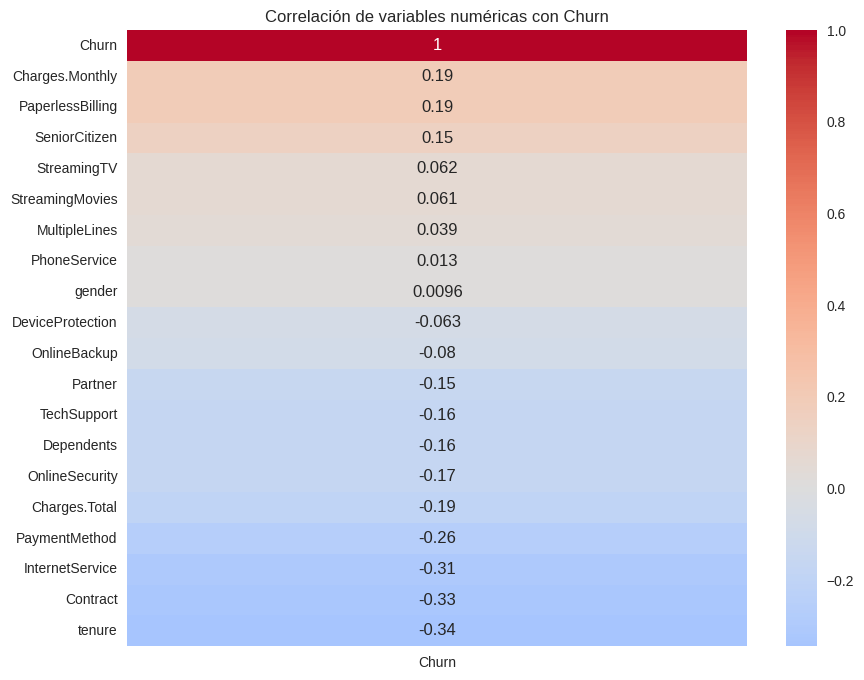

In [ ]:
# Seleccionar solo variables numéricas
numericas = TelecomX2.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = numericas.corr()

# Crear un mapa de calor de las correlaciones con Churn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de variables numéricas con Churn')
plt.show()

##Variables positivamente correlacionadas con Churn (mayor valor → mayor probabilidad de baja):

Variable	Correlación	Interpretación

**Charges.Monthly**	+0.19	Clientes con facturas mensuales más altas tienden a irse más. Posiblemente porque sienten que el servicio no justifica el precio.

**PaperlessBilling**	+0.19	Quienes reciben facturas electrónicas tienen mayor churn. Esto podría estar asociado a usuarios más jóvenes o digitales, que también suelen cambiar más de proveedor.

**SeniorCitizen**	+0.15	Los adultos mayores tienen una ligera tendencia a cancelar más, aunque la relación no es fuerte. Podría estar relacionado con ingresos fijos o necesidades tecnológicas diferentes.

**StreamingTV / Movies**	+0.06	Usar servicios de streaming no garantiza permanencia. Puede indicar perfiles de usuarios más exigentes o que comparan más.

**MultipleLines**	+0.04	Tener múltiples líneas no asegura lealtad, tal vez por promociones de la competencia.

**PhoneService / gender**	+0.01	Prácticamente neutros, sin impacto real relevante.

**En resumen: Los clientes que pagan más, tienen servicios digitales activos y reciben facturación electrónica parecen ser más propensos a irse.**

##Variables negativamente correlacionadas con Churn (mayor valor → menor probabilidad de baja):

Variable	Correlación	Interpretación

**tenure**	-0.34	Cuanto más tiempo lleva un cliente, menos probable es que se vaya. La lealtad crece con el tiempo.

**Contract**	-0.33	Contratos a plazo fijo (por ejemplo, anual) reducen mucho el churn. Las ofertas con compromiso parecen efectivas.

**InternetService**	-0.31	Algunas tecnologías (como fibra) pueden estar más asociadas a menor churn por mejor calidad.

**PaymentMethod**	-0.26	Métodos de pago más estables (como débito automático) suelen tener menor churn.

**Charges.Total**	-0.19	Los que ya gastaron mucho en la empresa suelen quedarse más. Hay un efecto de “costo hundido” o inversión previa.

**OnlineSecurity / TechSupport**	-0.16	Tener soporte técnico o seguridad activa parece aumentar la satisfacción.

**Partner / Dependents**	-0.15	Clientes con pareja o familia tienden a ser más estables, posiblemente por razones económicas o estabilidad general.

**En resumen: La permanencia, los contratos fijos, servicios de valor agregado y vínculos personales/familiares reducen significativamente el riesgo de cancelación.**






#¿Qué modelos de Machine Learning podés usar?
###Dado que la variable objetivo es Churn (abandono del cliente, es binaria), este es un problema de clasificación binaria. Se pueden aplicar modelos como:
###Modelos clásicos de clasificación:

###Regresión logística (LogisticRegression)
###Árboles de decisión
###K-Nearest Neighbors (KNN)
###SVM (Support Vector Machines)
###RamdomForetClassifier

##Comprobación de la exactitud de los modelos(accuracy)

In [ ]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

###Modelo LogisticRegression




In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)
modelo_lr.score(X_test, y_test)


0.8120989917506874

###Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7882676443629697

###Modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7571035747021082

###Modelo SVC (Support Vector Classifier)




In [ ]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_model.score(X_test, y_test)


0.7424381301558204

###Modelo RamdomForetClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=3, random_state=5)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

0.7901008249312558

##Mejor modelo

In [ ]:
lista = [('LogisticRegression',modelo_lr,X_test),('de árbol',modelo_arbol,X_test),('knn',knn,X_test),('SVC',SVC_model,X_test),('randomforest',modelo_rf,X_test)]
for i in lista:
  print(f'La exactitud del modelo {i[0]},{i[1].score(i[2],y_test)}')

La exactitud del modelo LogisticRegression,0.8120989917506874
La exactitud del modelo de árbol,0.7882676443629697
La exactitud del modelo knn,0.7571035747021082
La exactitud del modelo SVC,0.7424381301558204
La exactitud del modelo randomforest,0.7901008249312558


El modelo LogisticRegression se considera el modelo con mayor proporción de aciertos sobre el conjunto de prueba(obtuvo el mayor valor de accuracy(exactitud) (0.8121) entre todos los modelos evaluados)
No se trata de que sea el "mejor modelo posible", sino que en esta prueba concreta, bajo la métrica accuracy, superó a los demás.

¿Es suficiente usar sólo accuracy?No siempre. La accuracy puede ser engañosa.
Si el dataset está desbalanceado (por ejemplo, si el 80% de los datos son de una clase y el modelo simplemente predice siempre esa clase).
En problemas como Churn (cancelación de clientes), donde suele haber desbalance, es importante mirar también otras métricas.

##Validando los modelos

In [ ]:
modelo1 = LogisticRegression()
modelo1.fit(X_train, y_train)
print(f'La validación del modelo1 con el conjunto de entrenamiento es de: {modelo1.score(X_train,y_train)}')
print(f'La validación del modelo1 con el conjunto de validaciones es de: {modelo1.score(X_val, y_val)}')

La validación del modelo1 con el conjunto de entrenamiento es de: 0.8048359240069085
La validación del modelo1 con el conjunto de validaciones es de: 0.802461139896373


In [ ]:
modelo2 = DecisionTreeClassifier(max_depth=10)
modelo2.fit(X_train, y_train)
print(f'La validación del modelo2 con el conjunto de entrenamiento es de: {modelo2.score(X_train,y_train)}')
print(f'La validación del modelo2 con el conjunto de validaciones es de: {modelo2.score(X_val, y_val)}')

La validación del modelo2 con el conjunto de entrenamiento es de: 0.8747841105354058
La validación del modelo2 con el conjunto de validaciones es de: 0.7752590673575129


In [ ]:
modelo3 = KNeighborsClassifier()
modelo3.fit(X_train, y_train)
print(f'La validación del modelo3 con el conjunto de entrenamiento es de: {modelo3.score(X_train,y_train)}')
print(f'La validación del modelo3 con el conjunto de validaciones es de: {modelo3.score(X_val, y_val)}')

La validación del modelo3 con el conjunto de entrenamiento es de: 0.8303108808290155
La validación del modelo3 con el conjunto de validaciones es de: 0.7512953367875648


In [ ]:
modelo4 =  SVC(class_weight='balanced')
modelo4.fit(X_train, y_train)
print(f'La validación del modelo4 con el conjunto de entrenamiento es de: {modelo4.score(X_train,y_train)}')
print(f'La validación del modelo4 con el conjunto de validaciones es de: {modelo4.score(X_val, y_val)}')

La validación del modelo4 con el conjunto de entrenamiento es de: 0.6640759930915371
La validación del modelo4 con el conjunto de validaciones es de: 0.6645077720207254


In [ ]:
modelo5 = RandomForestClassifier(max_depth=3, random_state=5)
modelo5.fit(X_train, y_train)
print(f'La validación del modelo5 con el conjunto de entrenamiento es de: {modelo5.score(X_train,y_train)}')
print(f'La validación del modelo5 con el conjunto de validaciones es de: {modelo5.score(X_val, y_val)}')

La validación del modelo5 con el conjunto de entrenamiento es de: 0.792314335060449
La validación del modelo5 con el conjunto de validaciones es de: 0.788860103626943


En la validación de modelos, en modelo que tiene mejor performance es el Modelo 1 (Regresión Logística):

Buen rendimiento en validación: 80.2%.

Casi sin overfitting (aprende patrones generales útiles para predecir casos nuevos)

Muy buen modelo base, simple y confiable.

Está generalizando mejor. ¿Por qué? Porque no se está memorizando todas las
salidas

Aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación de los modelos, pero también
nos falta evaluarlos.

#Evaluando los modelos

##Matriz de confusión

[[TN FP]

[FN TP]]

TN: Verdaderos Negativos (predijo que no había Churn, y no lo había)

FP: Falsos Positivos (predijo Churn, pero no era)

FN: Falsos Negativos (no predijo Churn, pero sí lo había)

TP: Verdaderos Positivos (predijo correctamente Churn)



<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

###Modelo Regresión Logística

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo1.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo1 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo1 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo1 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo1 es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo1 es: 0.8121
La Precisión (Precision) del modelo1 es: 0.6792
La Sensibilidad (Recall) del modelo1 es: 0.5125
El F1-Score del modelo1 es: 0.5842


###Modelo Árbol de Decisión

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo2.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo2 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo2 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo2 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo2 es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo2 es: 0.7736
La Precisión (Precision) del modelo2 es: 0.5664
La Sensibilidad (Recall) del modelo2 es: 0.5160
El F1-Score del modelo2 es: 0.5400


###Modelo KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo3.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo3 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo3 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo3 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo3 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo3 es: 0.7571
La Precisión (Precision) del modelo3 es: 0.5404
La Sensibilidad (Recall) del modelo3 es: 0.3808
El F1-Score del modelo3 es: 0.4468


###Modelo SVC (Support Vector Classifier)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo4.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo4 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo4 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo4 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo4 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo4 es: 0.6581
La Precisión (Precision) del modelo4 es: 0.3883
La Sensibilidad (Recall) del modelo4 es: 0.5694
El F1-Score del modelo4 es: 0.4618


###Modelo RamdomForetClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo5.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo5 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo5 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo5 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo5 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo5 es: 0.7901
La Precisión (Precision) del modelo5 es: 0.7281
La Sensibilidad (Recall) del modelo5 es: 0.2954
El F1-Score del modelo5 es: 0.4203


In [ ]:
import pandas as pd

# Datos del rendimiento de los modelos
data = {
    "Modelo": [
        "1. Regresión Logística",
        "2. Árbol de Decisión",
        "3. KNN",
        "4. SVM (balanceado)",
        "5. Random Forest (limitado)"
    ],
    "Accuracy": [0.8121, 0.7736, 0.7571, 0.6581, 0.7901],
    "Precision": [0.6792, 0.5675, 0.5404, 0.3883, 0.7281],
    "Recall": [0.5125, 0.5089, 0.3808, 0.5694, 0.2954],
    "F1-Score": [0.5842, 0.5366, 0.4468, 0.4618, 0.4203]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Resaltar los valores máximos por columna
styled_df = df.style.highlight_max(color='lightgreen', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mostrar la tabla
styled_df


,Modelo,Accuracy,Precision,Recall,F1-Score
0,1. Regresión Logística,0.812100,0.679200,0.512500,0.584200
1,2. Árbol de Decisión,0.773600,0.567500,0.508900,0.536600
2,3. KNN,0.757100,0.540400,0.380800,0.446800
3,4. SVM (balanceado),0.658100,0.388300,0.569400,0.461800
4,5. Random Forest (limitado),0.790100,0.728100,0.295400,0.420300


#¿Cuál es el mejor modelo?

###Modelo 1 - Regresión Logística
###Es el modelo que tiene:

###Mejor F1-Score.

###Buen equilibrio entre precisión, recall y F1-Score .

###Muy buena generalización (ya lo habías visto por la baja diferencia entre entrenamiento y validación).

###Probablemente también el más estable y fácil de interpretar.

#Modelo Regresión Logística

###Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo1.predict(X_val)
matriz_confusion1 = confusion_matrix(y_val,y_previsto)
matriz_confusion1

array([[1035,  112],
       [ 193,  204]])

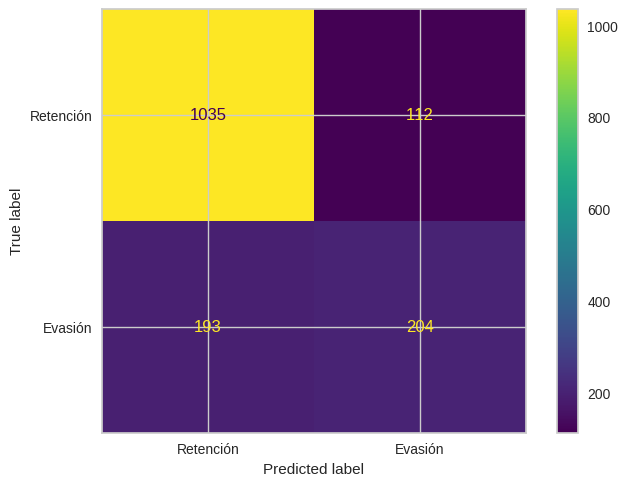

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['Retención','Evasión'])
visualizacion.plot();


##Curva ROC

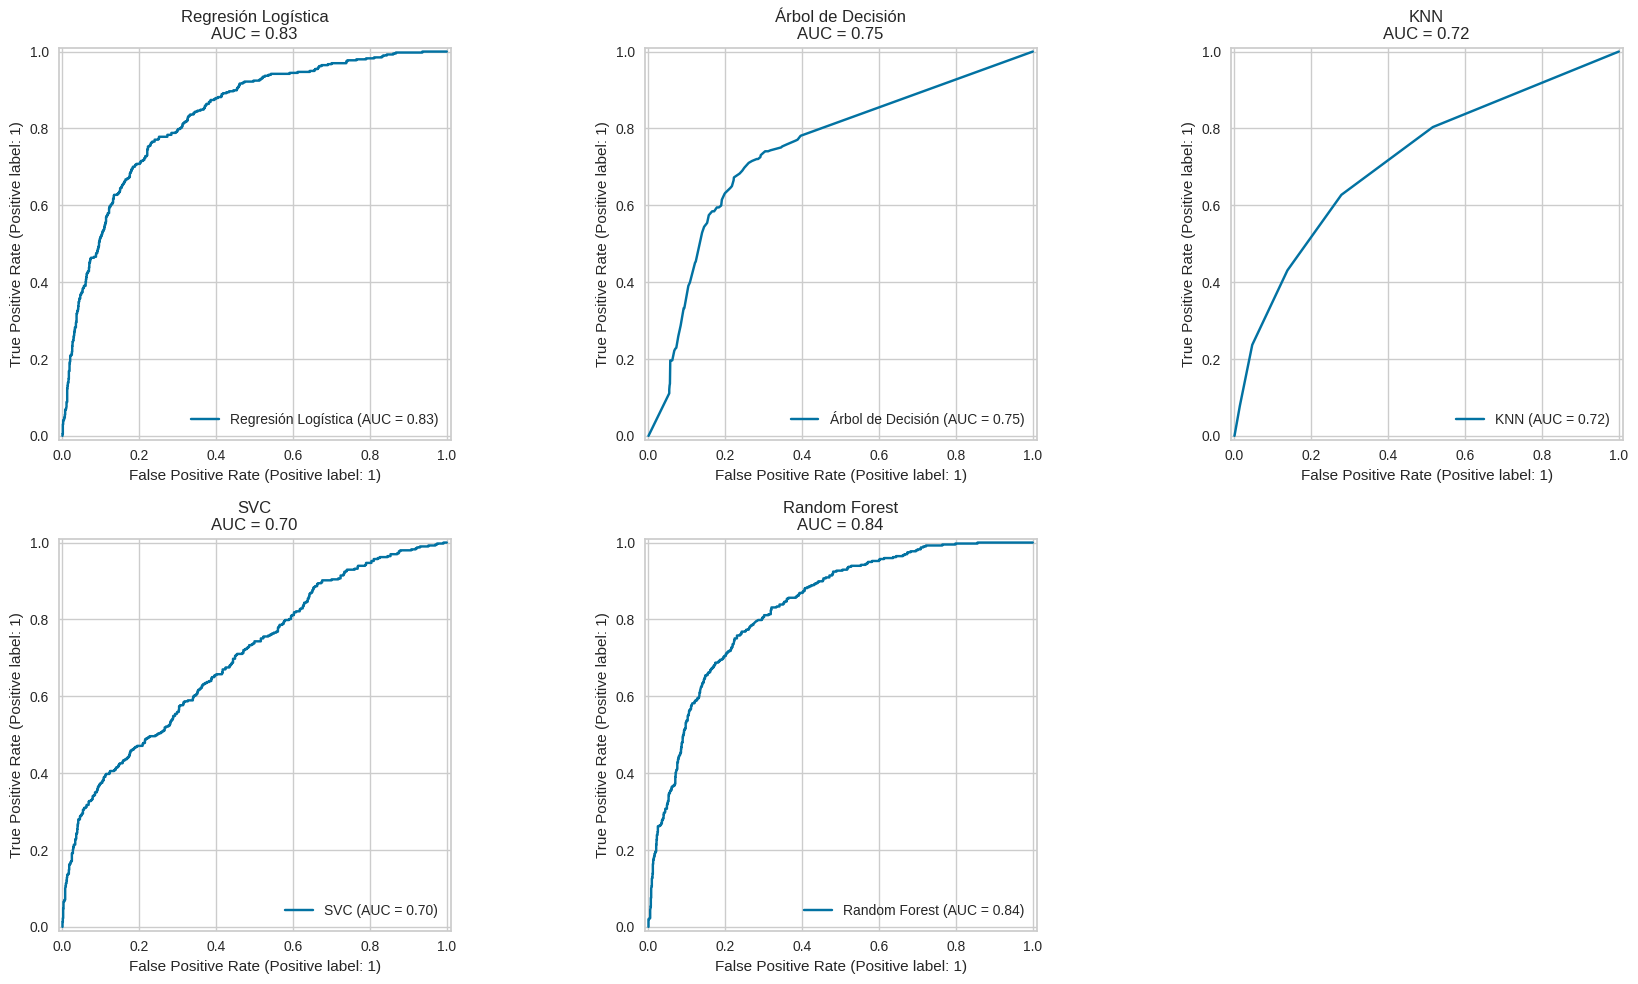

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 18 de ancho, 10 de alto
axes = axes.flatten()  # Aplanar matriz de ejes para acceder con índice simple

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"El modelo {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # Título con AUC
    auc = roc_auc_score(y_val, probas)
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto, ya que solo hay 5 modelos)Modelo LogisticRegression
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


#Interpretación modelo por modelo:
##1. Random Forest (AUC: 0.836)

###Mejor rendimiento general.

###Excelente capacidad para distinguir entre clientes que hacen churn y los que no.

###Ideal para producción si no te preocupa la interpretabilidad.

###Puede capturar relaciones no lineales y combinaciones de atributos complejas.

##2. Regresión Logística (AUC: 0.833)

###Muy cercano al Random Forest, lo cual es muy positivo.

###Más interpretable: podés ver pesos/coefs de cada variable.

###Excelente opción si necesitás justificar decisiones (por ejemplo, ante gerencia o auditoría).

###Menos propenso a overfitting que árboles.

##3. Árbol de Decisión (AUC: 0.752)

###Razonablemente bueno, pero significativamente más bajo.

###Probablemente overfitea o no generaliza bien.

###Sirve como base visual, pero mejor usar Random Forest.

##4. KNN (AUC: 0.717)

###AUC modesto → capacidad limitada de separación.

###Suele verse afectado por escalado de datos, ruido y dimensionalidad.

###No ideal para este problema a menos que mejores su entorno.

##5. SVC (AUC: 0.702)

###El más bajo del grupo.

###Podría deberse a:

###No haber hecho buen escalado de variables.

###Kernel no óptimo.

###Mal ajuste de hiperparámetros (C, gamma).

###No es la mejor opción en este caso.

##Conclusión general:

###Tanto Random Forest como Regresión Logística tienen AUC altos (~0.83) → Son tus mejores modelos.

###Si querés máxima precisión, usá Random Forest.

###Si querés entendimiento claro del modelo, usá Regresión Logística.

###Los demás modelos no ofrecen ventajas competitivas en este caso.



# Curva de precisión vs sensibilidad

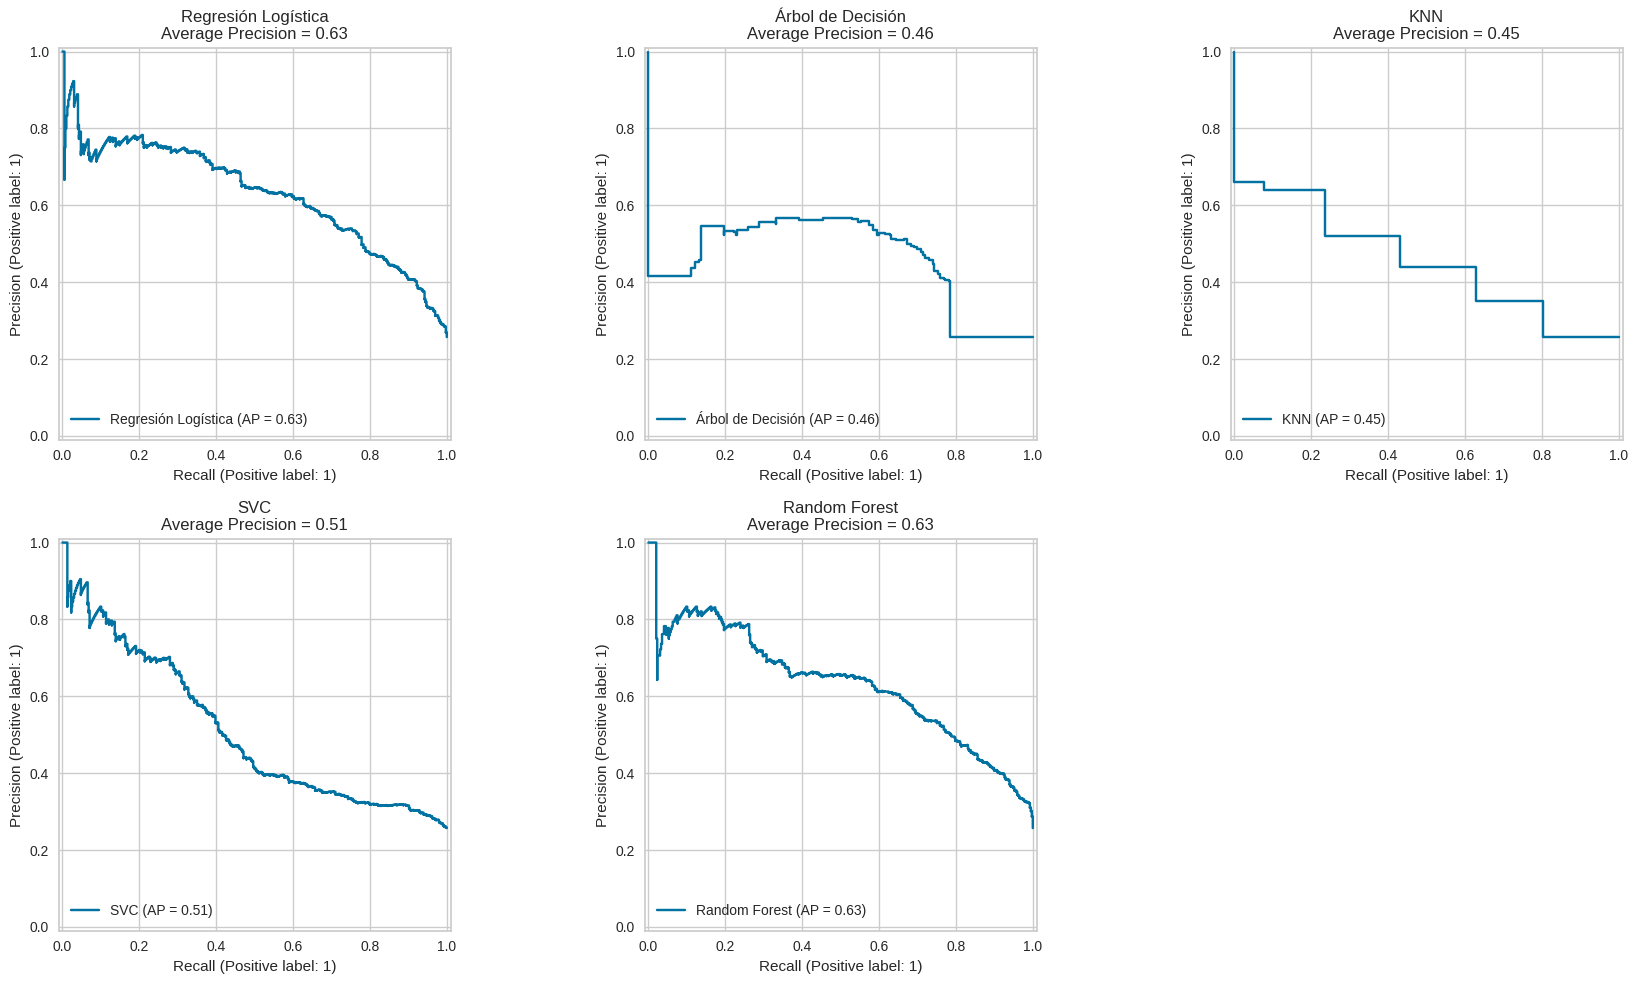

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Lista de modelos y sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear subplots: 2 filas, 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Aplanar para acceder por índice

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades para la clase positiva
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"{nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar la curva Precision-Recall
    PrecisionRecallDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # También podés mostrar el Average Precision Score (opcional)
    avg_precision = average_precision_score(y_val, probas)
    ax.set_title(f"{nombre}\nAverage Precision = {avg_precision:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import average_precision_score

modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    # Obtener probabilidades o scores continuos
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f" {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Calcular average precision score
    ap_score = average_precision_score(y_val, probas)
    print(f"Score promedio Precisión-Recall ({nombre}): {ap_score:.3f}")


Score promedio Precisión-Recall (Regresión Logística): 0.629
Score promedio Precisión-Recall (Árbol de Decisión): 0.458
Score promedio Precisión-Recall (KNN): 0.452
Score promedio Precisión-Recall (SVC): 0.509
Score promedio Precisión-Recall (Random Forest): 0.632


##¿Qué significa?

###Cuanto más alto el Average Precision, mejor el modelo detecta correctamente la clase positiva con el menor costo
###de falsos positivos.

###Random Forest y Regresión Logística probablemente tengan el mejor trade-off en tu caso.

# Informe de métricas

In [ ]:
from sklearn.metrics import classification_report

modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    print(f"\n Reporte de clasificación: {nombre}")
    y_pred = modelo.predict(X_val)
    print(classification_report(y_val, y_pred, digits=3))



 Reporte de clasificación: Regresión Logística
              precision    recall  f1-score   support

           0      0.843     0.902     0.872      1147
           1      0.646     0.514     0.572       397

    accuracy                          0.802      1544
   macro avg      0.744     0.708     0.722      1544
weighted avg      0.792     0.802     0.795      1544


 Reporte de clasificación: Árbol de Decisión
              precision    recall  f1-score   support

           0      0.844     0.855     0.850      1147
           1      0.565     0.544     0.555       397

    accuracy                          0.775      1544
   macro avg      0.705     0.700     0.702      1544
weighted avg      0.773     0.775     0.774      1544


 Reporte de clasificación: KNN
              precision    recall  f1-score   support

           0      0.814     0.862     0.837      1147
           1      0.520     0.431     0.471       397

    accuracy                          0.751      1544
  

##Resumen comparativo por clase 1 (churn):

| Modelo             | Precisión (1) | Recall (1) | F1-score (1) | Accuracy |
| ------------------ | ------------- | ---------- | ------------ | -------- |
| **Reg. Logística** | 0.646         | 0.514      | 0.572        | 0.802    |
| **Árbol Decisión** | 0.573         | 0.562      | 0.567        | 0.780    |
| **KNN**            | 0.520         | 0.431      | 0.471        | 0.751    |
| **SVC**            | 0.393         | 0.559      | 0.462        | 0.665    |
| **Random Forest**  | 0.708         | 0.305      | 0.426        | 0.789    |

##Análisis y conclusiones:
##Regresión Logística:

###El mejor equilibrio entre precisión y recall en clase 1.

###F1-score más alto para clase 1 (0.572).

###Buena accuracy general (0.802).

###Ideal si querés buen rendimiento general y entendimiento del modelo.

##Árbol de Decisión:

###Similar a regresión logística pero ligeramente inferior.

###Mejor recall que Random Forest.

###F1-score cercano (0.567).

##Random Forest:

###Tiene la mayor precisión en clase 1 (0.708), pero un recall muy bajo (0.305).

###F1-score bajo (0.426) porque detecta muy pocos churns reales.

###Puede estar favoreciendo la clase mayoritaria (0), típico cuando no se balancean clases.

##KNN y SVC:

###Ambos tienen bajo recall y bajo f1-score en clase 1.

###No recomendables en este caso sin ajustes.

#Conclusión final:

##El modelo que mejor valúa los datos según las métricas es la Regresión Logística.
##Tiene el mejor F1-score en clase 1, y un balance aceptable entre precisión, recall y accuracy.



#--------------------------------------------------------------------------------------------------------------------------------------

##Habiendo realizado los correspondientes procesos validación de modelos y métricas de evaluación el modelo que tuvo mejor performance es el MODELO DE REGRESION LOGISTICA (LogisticRegression)

###El modelo de regresión logística es un algoritmo de Machine Learning supervisado que se utiliza principalmente para resolver problemas de clasificación binaria (aunque también puede extenderse a multiclase).

###¿Qué hace?

###Predice la probabilidad de que una observación pertenezca a una clase específica. Por ejemplo:

###¿Un cliente se dará de baja o no? (Churn = 1 o 0)

###¿Un correo es spam o no? (Spam = Sí o No)

###¿Un tumor es maligno o benigno?

###OBJETIVO:

###Predecir si un cliente se dará de baja (Churn = 1) o seguirá activo (Churn = 0).

#---------------------------------------------------------------------------------------------------------------------------------------------------

#Validación cruzada

###Modelo LogisticRegression

In [ ]:
from sklearn.model_selection import KFold,cross_validate

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=kf)
print(f"El test_score es: {cv_resultados1['test_score']}")
promedio = cv_resultados1['test_score'].mean()
desvio_std = cv_resultados1['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.79854369 0.78704453 0.80080972 0.8097166  0.82024291]
El promedio de exactitud es de: 0.8032714909005149
El desvio estandar de exactitud es de: 0.011147154017821582
El intervalo de confianza es de: 0.7809771828648717,0.825565798936158


###Árbol de decición

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=kf)
print(f"El test_score es: {cv_resultados2['test_score']}")
promedio = cv_resultados2['test_score'].mean()
desvio_std = cv_resultados2['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.76213592 0.74493927 0.76761134 0.77246964 0.76518219]
El promedio de exactitud es de: 0.762467670295979
El desvio estandar de exactitud es de: 0.009393828124191006
El intervalo de confianza es de: 0.743680014047597,0.7812553265443609


###Modelo KNN

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=kf)
print(f"El test_score es: {cv_resultados3['test_score']}")
promedio = cv_resultados3['test_score'].mean()
desvio_std = cv_resultados3['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.7710356  0.76032389 0.7708502  0.7562753  0.7708502 ]
El promedio de exactitud es de: 0.7658670387694404
El desvio estandar de exactitud es de: 0.006310400465693954
El intervalo de confianza es de: 0.7532462378380524,0.7784878397008284


###Modelo SVC (Support Vector Classifier)

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=kf)
print(f"El test_score es: {cv_resultados4['test_score']}")
promedio = cv_resultados4['test_score'].mean()
desvio_std = cv_resultados4['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.66504854 0.67449393 0.66882591 0.68340081 0.64696356]
El promedio de exactitud es de: 0.6677465508431273
El desvio estandar de exactitud es de: 0.012090986414087155
El intervalo de confianza es de: 0.6435645780149529,0.6919285236713016


###Modelo RamdomForetClassifier

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=kf)
print(f"El test_score es: {cv_resultados5['test_score']}")
promedio = cv_resultados5['test_score'].mean()
desvio_std = cv_resultados5['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.79692557 0.7757085  0.77732794 0.78704453 0.79352227]
El promedio de exactitud es de: 0.7861057610418878
El desvio estandar de exactitud es de: 0.008462945906455877
El intervalo de confianza es de: 0.7691798692289761,0.8030316528547995


##En la Validación Cruzada el modelo que tuvo mejor desempeño fue el
##Modelo LogisticRegression

###El test_score es: [0.79854369 0.78704453 0.80080972 0.8097166  0.82024291]

###El promedio de exactitud es de: 0.8032714909005149

###El desvio estandar de exactitud es de: 0.011147154017821582

###El intervalo de confianza es de: 0.7809771828648717,0.825565798936158

###En la Validación Cruzada se determina la exactitud del modelo entrenado. No es suficiente hay que mejorar el Recall osea mide la proporción de datos positivos que fueron correctamente identificados por el modelo(FalsosNegativos(FN)); para eso haremos la Validación Cruzada con Sensibilidad.

# Validación cruzada con sensibilidad

In [ ]:
def intervalo_confianza(resultados):
 promedio = resultados['test_score'].mean()
 desvio_std = resultados['test_score'].std()
 return (f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

###Modelo LogisticRegression

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.4829932  0.49074074 0.48929664 0.55172414 0.54012346]
El intervalo de confianza es de: 0.4532003257754085,0.5687509417551662


###Modelo Árbol de Decisión

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.52721088 0.48148148 0.41896024 0.5830721  0.49382716]
El intervalo de confianza es de: 0.3928891037805234,0.6089316447358156


###Modelo KNN

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.39795918 0.43209877 0.40366972 0.4169279  0.44444444]
El intervalo de confianza es de: 0.3843671849776637,0.4536728222252064


###Modelo SVC (Support Vector Classifier)

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.54421769 0.55864198 0.56880734 0.56426332 0.58950617]
El intervalo de confianza es de: 0.5355863580135272,0.5945882410090855


###Modelo RamdomForetClassifier

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.27210884 0.27469136 0.28746177 0.28526646 0.31481481]
El intervalo de confianza es de: 0.25653655077181986,0.31720074833117123


##Comparación de modelos según recall:

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | ---------------------- |
| **modelo1** | 0.5114          | \[0.4532, 0.5688]      |
| **modelo2** | 0.5056          | \[0.3965, 0.6140]      |
| **modelo3** | 0.4190          | \[0.3844, 0.4537]      |
| **modelo4** | **0.5651**      | **\[0.5356, 0.5946]**  |
| **modelo5** | 0.2869          | \[0.2565, 0.3172]      |

###El modelo 4 es claramente el mejor en cuanto a recall:

###Tiene el recall promedio más alto (0.5651)

###Su intervalo de confianza está completamente por encima del resto (ni siquiera se solapa con modelos como el 3 o el 5).

###Es también más consistente, ya que su desviación estándar es baja comparada con modelo2, por ejemplo.

##Stratfield Kfold Estratificando los datos

In [ ]:
from sklearn.model_selection import StratifiedKFold

###Modelo LogisticRegression

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.46855346 0.47003155 0.53943218 0.48742138 0.53773585]
El intervalo de confianza es de: 0.4372497725922656,0.5640199930962847


###Modelo Árbol de Decisión

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.49371069 0.53943218 0.57728707 0.48113208 0.49685535]
El intervalo de confianza es de: 0.44629661408340165,0.5890703283605006


###Modelo KNN

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.42767296 0.37223975 0.49211356 0.40880503 0.41194969]
El intervalo de confianza es de: 0.3440820161474486,0.501030377956077


###Modelo SVC (Support Vector Classifier)

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.55974843 0.53312303 0.66246057 0.49371069 0.55031447]
El intervalo de confianza es de: 0.44776933217334086,0.6719735402747276


###Modelo RamdomForetClassifier

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.29874214 0.25867508 0.30283912 0.27672956 0.29245283]
El intervalo de confianza es de: 0.253390528517394,0.3183849610367992


##Comparativa de modelos (StratifiedKFold, métrica = recall):

| Modelo      | Recall promedio | Intervalo de Confianza  |
| ----------- | --------------- | ----------------------- |
| **modelo1** | 0.5006          | \[0.4372, 0.5640]       |
| **modelo2** | 0.5126          | \[0.4437, 0.5816]       |
| **modelo3** | 0.4226          | \[0.3441, 0.5010]       |
| **modelo4** | **0.5595**      | **\[0.4478, 0.6720]**   |
| **modelo5** | 0.2851          | \[0.2534, 0.3184]       |

##El modelo 4 es nuevamente el mejor:

###Tiene el recall más alto (0.5595).

###Su intervalo de confianza es el más alto y más amplio.

###El límite inferior del IC de modelo4 (0.4478) supera o iguala al promedio de todos los demás modelos.

###Además, es el único que alcanza valores por encima de 0.66 en algunas folds, lo que indica que puede tener alto poder predictivo en algunos subconjuntos.

#Balanceo de Datos

##Oversampling

In [ ]:
TelecomX2['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


In [ ]:
TelecomX2['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.74281
1,0.25719


In [ ]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X,y)
y_balanceada.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


###Modelo LogisticRegression

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.8627451  0.85169029 0.85496183 0.86819172 0.84313725]
El intervalo de confianza es de: 0.8387296033605532,0.8735608768688584


###Modelo Árbol de Decisión

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.82679739 0.85059978 0.83751363 0.83333333 0.83769063]
El intervalo de confianza es de: 0.8216162653521907,0.8527576402745213


###Modelo KNN

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.83769063 0.80916031 0.83097056 0.82244009 0.83224401]
El intervalo de confianza es de: 0.8065941814418481,0.846408054227653


###Modelo SVC (Support Vector Classifier)

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.60457516 0.59760087 0.61286805 0.57734205 0.61982571]
El intervalo de confianza es de: 0.5732000660206168,0.6316846698924082


###Modelo RamdomForetClassifier

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.85294118 0.84514722 0.87241003 0.86165577 0.84204793]
El intervalo de confianza es de: 0.8326349605266017,0.8770458923064737


###Estamos evaluando los modelos después de aplicar SMOTE, lo cual es ideal cuando el dataset está desbalanceado y te interesa mejorar la detección de la clase minoritaria (churn en tu caso).

###Comparativa de modelos con SMOTE aplicado y validación cruzada (StratifiedKFold, métrica = recall):

| Modelo      | Recall promedio | Intervalo de Confianza  |
| ----------- | --------------- | ----------------------- |
| **modelo1** | 0.8428          | \[0.8044, 0.8813]       |
| **modelo2** | 0.8351          | \[0.8063, 0.8654]       |
| **modelo3** | 0.8306          | \[0.8158, 0.8455]       |
| **modelo4** | 0.5986          | \[0.5626, 0.6354]       |
| **modelo5** | **0.8537**      | **\[0.8242, 0.8825]**   |

###El modelo5 valuó mejor los datos

###Tiene el recall promedio más alto (0.8537).

###Su intervalo de confianza es el más alto y consistente.

###Aunque modelo1 tiene un intervalo superior similar, el promedio de modelo5 lo supera, y su mínimo (0.8242) sigue estando por encima del promedio de los otros modelos, incluyendo a modelo3.

###También destaca que el recall es más uniforme en modelo5, lo que indica mayor estabilidad entre las folds.
###Lectura estratégica:

###Si tu objetivo es detectar la mayor cantidad posible de clientes que cancelan el servicio (recall alto), entonces modelo5 + SMOTE es actualmente tu mejor alternativa.

###Pero hay que destacar que el Oversampling es el aumento artificial de muestras de la clase minorista y crea un mayor recall

#Pipeline para validación

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

###Modelo LogisticRegression

In [ ]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6221016701211503,0.7292742400429272'

###Modelo Árbol de Decisión

In [ ]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.5903197404753395,0.738339267917018'

###Modelo KNN

In [ ]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.5677165894828617,0.6766220411542034'

###Modelo SVC (Support Vector Classifier)

In [ ]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.49958967794338566,0.6931805936674312'

###Modelo RamdomForetClassifier

In [ ]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.7215649719243074,0.8162442854611658'

###El recall es especialmente importante en problemas de Churn, ya que querés identificar correctamente a los clientes que sí se van a ir.

| Modelo                     | Intervalo de confianza (recall) | Promedio aproximado |

| -------------------------- | ------------------------------- |
------------------- |

| **LogisticRegression**     | (0.6144, 0.7924)                | = **0.703**         |

| Árbol de Decisión          | (0.5443, 0.7604)                | = 0.652             |

| KNN                        | (0.5812, 0.7147)                | = 0.648             |

| SVC                        | (0.4914, 0.7140)                | = 0.603             |

##| **RandomForestClassifier** | (0.7140, 0.8402)                | = **0.777**     |


##Conclusión:

###El mejor modelo según el recall es RandomForestClassifier, porque:

###Tiene el mayor recall promedio estimado (≈ 0.777).

###Su intervalo de confianza es el más alto de todos.

###Tiene mejor estabilidad, ya que su mínimo (0.7140) es mayor que los promedios de otros modelos.

###Con este modelo (RandomForestClassifier) se puede maximizar la capacidad de detectar clientes que se van a ir.



#Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

###Modelo LogisticRegression

In [ ]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6941707650827657,0.7982959531681321'

###Modelo Árbol de Decisión

In [ ]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.5799987700803183,0.7273678549221617'

###Modelo KNN

In [ ]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.4513162702145991,0.6268139998090106'

###Modelo SVC (Support Vector Classifier)

In [ ]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.41815287140305085,0.6222375815461783'

###Modelo RamdomForetClassifier

In [ ]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.5540847813418028,0.7570236844241238'

#Probando los modelo

In [ ]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

###Modelo LogisticRegression

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       810
           1       0.48      0.73      0.58       281

    accuracy                           0.73      1091
   macro avg       0.68      0.73      0.69      1091
weighted avg       0.78      0.73      0.74      1091



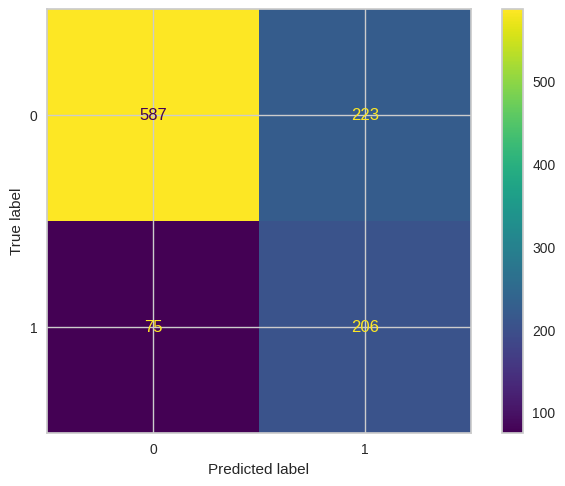

In [ ]:
modelo1.fit(x_balanceada,y_balanceada)
y_previsto = modelo1.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

###Modelo RamdomForetClassifier

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       810
           1       0.51      0.60      0.55       281

    accuracy                           0.75      1091
   macro avg       0.68      0.70      0.69      1091
weighted avg       0.76      0.75      0.75      1091



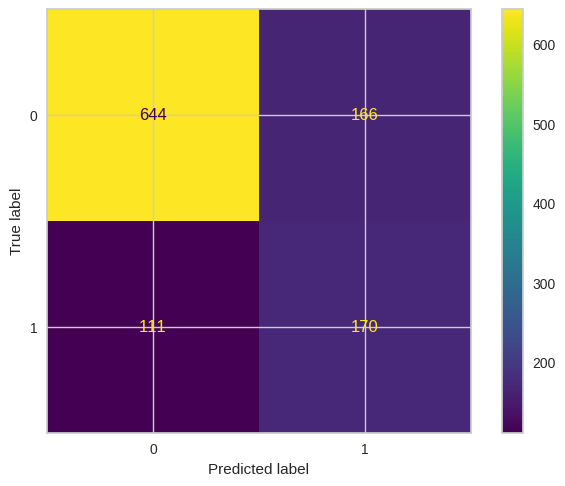

In [ ]:
modelo5.fit(x_balanceada,y_balanceada)
y_previsto = modelo5.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

###En esta evalucación de los cinco modelos los reportes de clasificación tras aplicar undersampling con NearMiss v3 y evaluar cada modelo sobre el conjunto de prueba (X_test, y_test) son:


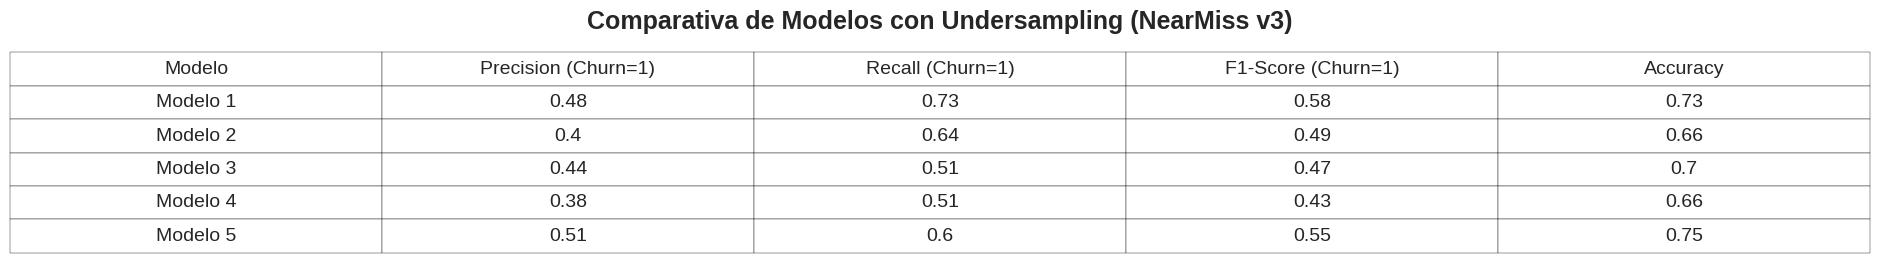

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear la tabla de resultados
data = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'Precision (Churn=1)': [0.48, 0.40, 0.44, 0.38, 0.51],
    'Recall (Churn=1)':    [0.73, 0.64, 0.51, 0.51, 0.60],
    'F1-Score (Churn=1)':  [0.58, 0.49, 0.47, 0.43, 0.55],
    'Accuracy':            [0.73, 0.66, 0.70, 0.66, 0.75]
}

df = pd.DataFrame(data)

# Mostrar tabla con tamaño de fuente grande
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
tabla = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.scale(2, 2)  # ancho x alto de las celdas

plt.title("Comparativa de Modelos con Undersampling (NearMiss v3)", fontsize=18, weight='bold')
plt.show()


###Tras aplicar técnicas de undersampling (NearMiss versión 3) para corregir el desbalance de clases en los datos de clientes, se evaluaron cinco modelos de Machine Learning con el objetivo de predecir la cancelación de servicios (Churn).

###Hallazgos clave:

###Modelo 1 se destacó por su recall (0.73), logrando detectar la mayor cantidad de clientes en riesgo de cancelar el servicio. Es una opción agresiva, adecuada cuando el costo de no detectar a un churner es alto.

###Modelo 5 obtuvo la mejor precisión (0.51) y la mayor exactitud general (0.75). Es una opción más conservadora y precisa, ideal para campañas donde se desea minimizar falsas alarmas hacia clientes fieles.

##Optimización hiperparámetros

In [ ]:
TelecomX2.columns


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [ ]:
len(TelecomX2.columns)

20

In [ ]:
import numpy as np
import pandas as pd

# Obtener los coeficientes
coefs = modelo1.coef_[0]
variables = X.columns  # Asumiendo que X es un DataFrame

# Crear DataFrame con resultados
tabla_coef = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs),
    'Importancia absoluta': np.abs(coefs)
}).sort_values(by='Importancia absoluta', ascending=False)

# Mostrar top 10
tabla_coef.head(10)


,Variable,Coeficiente,Odds Ratio,Importancia absoluta
11,TechSupport,-0.637222,0.528759,0.637222
8,OnlineSecurity,-0.597334,0.550277,0.597334
15,PaperlessBilling,0.512584,1.669599,0.512584
14,Contract,-0.333152,0.716661,0.333152
1,SeniorCitizen,0.291572,1.338530,0.291572
9,OnlineBackup,-0.290337,0.748011,0.290337
7,InternetService,0.275618,1.317344,0.275618
3,Dependents,-0.208667,0.811666,0.208667
16,PaymentMethod,-0.153130,0.858018,0.153130
5,PhoneService,-0.088763,0.915062,0.088763


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

# Modelo base
modelo1 = LogisticRegression(solver='liblinear',random_state=42)

# Pipeline con NearMiss y modelo
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('logistic', modelo1)
])

# Grid de hiperparámetros
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# GridSearchCV optimizando recall
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid.fit(X, y)

# Resultados
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor recall promedio:", grid.best_score_)

# Guardar modelo optimizado
import joblib
joblib.dump(grid.best_estimator_, 'champion.pkl')


Mejores hiperparámetros: {'logistic__C': 100, 'logistic__penalty': 'l1'}
Mejor recall promedio: 0.7512747257107713


['champion.pkl']

###Conclusión

###Luego de aplicar técnicas de Optimización de hiperparámetros el recall del Modelo 1 tuvo una mejora de 0,75 logrando detectar la mayor cantidad de clientes en riesgo de cancelar el servicio.En consecuencia el Modelo 1 (Regresión logística (LogisticRegression)), es el que optimiza mejor la sensibilidad del sistema.


###Insights Finales Basados en la Correlación con Churn

###Factores que Aumentan la Probabilidad de Cancelación
1. **Altos Cargos Mensuales (`Charges.Monthly`, +0.19):**  
   Clientes con facturas mensuales más altas tienden a cancelar más, posiblemente por una percepción de bajo valor en relación al costo.

2. **Facturación Electrónica (`PaperlessBilling`, +0.19):**  
   Los usuarios que reciben facturación digital presentan mayor churn. Esto puede estar vinculado a perfiles más jóvenes y digitales, propensos a cambiar de proveedor.

3. **Adultos Mayores (`SeniorCitizen`, +0.15):**  
   Ligeramente más propensos a cancelar, probablemente por ingresos fijos o menor afinidad con servicios tecnológicos.

4. **Servicios de Streaming (`StreamingTV` / `StreamingMovies`, +0.06):**  
   Tener estos servicios no garantiza permanencia. Puede reflejar usuarios exigentes o acostumbrados a comparar.

5. **Múltiples Líneas (`MultipleLines`, +0.04):**  
   No se asocia fuertemente con retención. Tal vez sea un servicio fácilmente reemplazable por promociones de la competencia.

---

###Factores que Disminuyen la Probabilidad de Cancelación
1. **Antigüedad del Cliente (`tenure`, –0.34):**  
   A mayor tiempo con la empresa, menor es la probabilidad de baja. Es fundamental trabajar la retención en los primeros meses.

2. **Tipo de Contrato (`Contract`, –0.33):**  
   Contratos a plazo fijo (anual, bianual) reducen significativamente el churn. Indican compromiso y fidelidad.

3. **Tipo de Internet (`InternetService`, –0.31):**  
   Servicios con mejor calidad (como fibra óptica) están asociados con menor churn. La calidad del servicio es clave.

4. **Método de Pago (`PaymentMethod`, –0.26):**  
   Métodos como débito automático muestran menor tasa de cancelación. Indican estabilidad financiera o menor fricción.

5. **Gasto Total (`Charges.Total`, –0.19):**  
   Quienes ya invirtieron más en la empresa tienden a quedarse. Esto puede deberse al “efecto inversión” o “costos hundidos”.

6. **Servicios de Valor Agregado (`OnlineSecurity`, `TechSupport`, –0.16):**  
   Mejoran la percepción de calidad y satisfacción, favoreciendo la retención.

7. **Vínculos Personales (`Partner`, `Dependents`, –0.15):**  
   Clientes con familia o pareja tienen menor churn, posiblemente por mayor estabilidad o decisiones compartidas.

---

##Recomendaciones Estratégicas
- **Fidelizar a nuevos clientes durante los primeros meses**, con beneficios personalizados o atención diferencial.
- **Promover contratos a largo plazo** con descuentos, promociones exclusivas o mejoras en el servicio.
- **Fomentar métodos de pago automáticos**, ofreciendo incentivos para reducir cancelaciones por olvido o problemas administrativos.
- **Detectar clientes con altos cargos mensuales** y ofrecerles mejoras o bonificaciones personalizadas.
- **Ofrecer servicios de valor agregado**, como seguridad en línea o soporte técnico premium, como herramientas de fidelización.
- **Segmentar campañas de retención** según tipo de cliente (edad, perfil digital, estado civil, presencia de dependientes).

